<a href="https://colab.research.google.com/github/xuanmaiDA/streamlit-example/blob/master/ppncln_doan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q streamlit
!npm install localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 4.576s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit f

In [2]:
# Chạy app streamlit
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.139.46.56
npx: installed 22 in 5.145s
your url is: https://fancy-impalas-do.loca.lt
/root/.npm/_npx/351/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:38405 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/351/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (events.js:315:20)
    at emitErrorNT (internal/streams/destroy.js:106:8)
    at emitErrorCloseNT (internal/streams/destroy.js:74:3)
    at processTicksAndRejections (internal/process/task_queues.js:80:21)


In [3]:
%%writefile app.py
# Cài đặt thư viện
import streamlit as st
import vnstock
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Title
st.title("Prediction Stock VietNam")

# Hiển thị dữ liệu lấy về
# Ví dụ lấy giá Vinhome từ ngày 06/11/2022 - 06/11/2023
data_stock = vnstock.stock_historical_data('VHM','2022-11-06','2023-11-06','1D')
data_stock = data_stock.set_index('time')
data_stock.drop('ticker', axis=1, inplace=True)
# Gồm có giá mở cửa, đóng cửa, thấp nhất, cao nhất, khối lượng giao dịch
data_stock.head(5)
#-------- Hiển thị
st.write("Dữ liệu chứng khoán Vinhome")
st.dataframe(data_stock.head(5))

# Vẽ biểu đồ thể hiện sự tăng giảm của cổ phiếu
bieu_do = go.Figure(data=go.Ohlc(x=data_stock.index, open=data_stock['open'],
                              high=data_stock['high'], low = data_stock['low'],
                              close = data_stock['close']))
#--------- Hiển thị
st.write("Biểu đồ thể hiện sự tăng giảm của cổ phiếu")
st.plotly_chart(bieu_do, use_container_width=True)

# Vẽ biểu đồ theo giá đóng cửa, mở cửa
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,4))
plt.title("Giá cổ phiếu của Cty có mã giao dịch là "+ "VNM")
plt.plot(data_stock["close"],linewidth = 2)
plt.plot(data_stock["open"],linewidth = 2)
plt.xlabel("Ngày",fontsize=18)
plt.ylabel("Giá cố phiếu ($) ",fontsize=18)
plt.legend(['Giá đóng cửa', 'Giá mở cửa'])

#--------- Hiển thị
st.write("Biểu đồ theo giá đóng cửa, mở ")
st.pyplot(plt)


#Biểu đồ cột
plt.figure(figsize=(16,6))
plt.bar(data_stock.index, data_stock['high'], color = 'red')
plt.title('Biểu đồ giá đóng cửa')
plt.xlabel('Ngày')
plt.ylabel('Giá cao nhất')
plt.xticks(rotation=50)
plt.yticks(rotation=100)
#--------- Hiển thị
st.write("Biểu đồ cột")
st.pyplot(plt)

Writing app.py


In [4]:
# Cài thư viện vnstock
!pip install vnstock
import vnstock

In [5]:

# Lấy giá chứng khoán
# Ví dụ lấy giá Vinhome từ ngày 06/11/2022 - 06/11/2023
data_stock = vnstock.stock_historical_data('VHM','2022-11-06','2023-11-06','1D')
data_stock = data_stock.set_index('time')
data_stock.drop('ticker', axis=1, inplace=True)
# Gồm có giá mở cửa, đóng cửa, thấp nhất, cao nhất, khối lượng giao dịch
data_stock.head(3)

,open,high,low,close,volume
time,,,,,
2022-11-07,44000,44000,42200,43900,3020500
2022-11-08,43100,43800,41250,43800,5521100
2022-11-09,43800,45000,43800,44550,4933400


In [6]:
# Cài đặt thư viện plotly
import plotly.graph_objects as go
# Vẽ biểu đồ thể hiện sự tăng giảm của cổ phiếu
bieu_do = go.Figure(data=go.Ohlc(x=data_stock.index, open=data_stock['open'],
                              high=data_stock['high'], low = data_stock['low'],
                              close = data_stock['close']))
bieu_do.show()

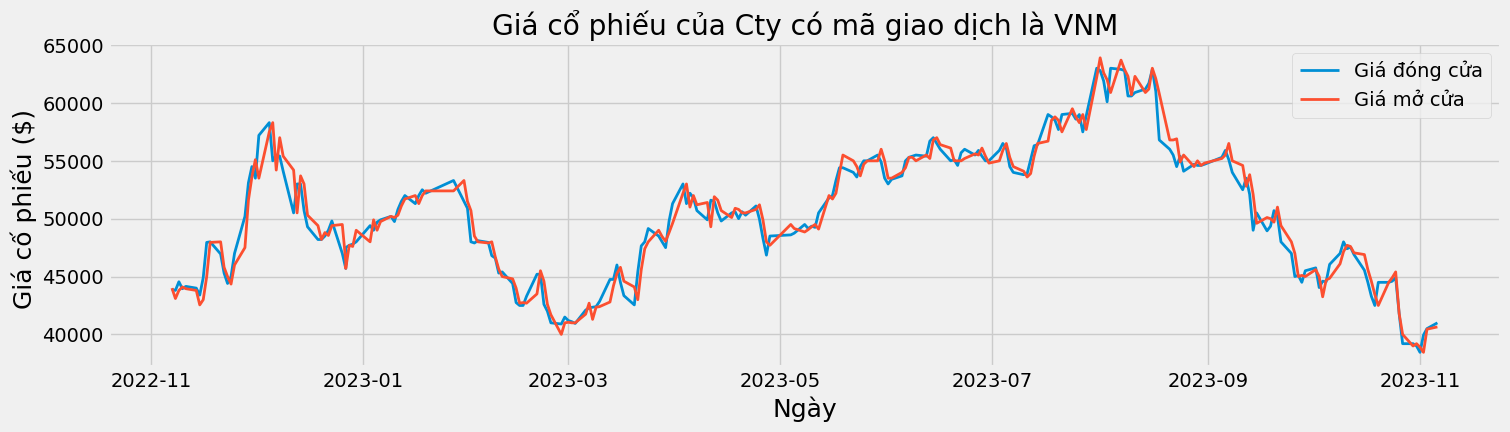

In [7]:
# Cài đặt thư viện
import matplotlib.pyplot as plt
# Vẽ biểu đồ theo giá đóng cửa, mở cửa - chênh lệch giữa giá mở cửa và giá đóng cửa
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,4))
plt.title("Giá cổ phiếu của Cty có mã giao dịch là "+ "VNM")
plt.plot(data_stock["close"],linewidth = 2)
plt.plot(data_stock["open"],linewidth = 2)
plt.xlabel("Ngày",fontsize=18)
plt.ylabel("Giá cố phiếu ($) ",fontsize=18)
plt.legend(['Giá đóng cửa', 'Giá mở cửa'])
plt.show()

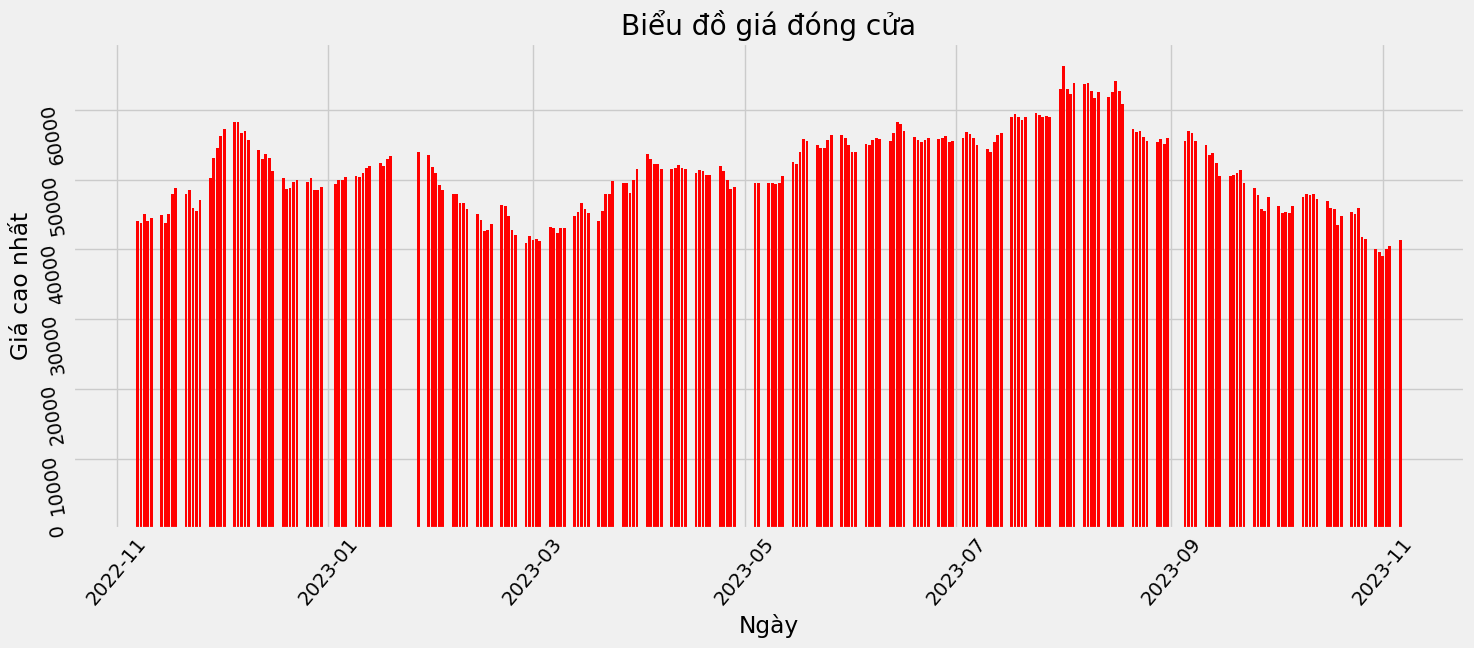

In [8]:
#Biểu đồ cột
plt.figure(figsize=(16,6))
plt.bar(data_stock.index, data_stock['high'], color = 'red')
plt.title('Biểu đồ giá đóng cửa')
plt.xlabel('Ngày')
plt.ylabel('Giá cao nhất')
plt.xticks(rotation=50)
plt.yticks(rotation=100)
plt.show()

In [9]:
# Xử lý dữ liệu trước khi train model
import math
from  sklearn.preprocessing import MinMaxScaler
import numpy as np
#Xử lý dữ liệu trước khi train
#Tạo bảng dữ liệu chỉ lấy cột giá chốt giao dịch ở cuối ngày
data = data_stock.filter(['close'])
#Tạo chuỗi chỉ chứa giá trị cổ phiếu
dataset = data.values
#Tính số hàng để huấn luyện mô hình
# 80% Train 20% Test
training_data_len = math.ceil( len(dataset) *.8)
#Chuyển toàn bộ dữ liệu về khoản [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
#Create the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0]) # 60 ngày để tạo ra 1 input
    y_train.append(train_data[i,0]) # lấy ngày tiếp theo để tạo ra output
#Chuyển dữ liệu train và dữ liệu test về dạng numpy để có thể làm việc với mô hình LSTM
x_train, y_train = np.array(x_train), np.array(y_train)

#Dữ liệu dùng để kiếm tra kết quả của mô hình
test_data = scaled_data[training_data_len - 60: , : ]
#Tạo dữ liệu dùng để test mô hình
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [10]:
# Model Linear Regressive
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression(fit_intercept=True)
model_linear.fit(x_train, y_train)
yfit=model_linear.predict(x_test)
predictions1 = scaler.inverse_transform([yfit])

In [11]:
# Model Linear Regressive
# Dự đoán bằng model
print('Giá trị dự đoán: ',predictions1[0][5],'\nGiá trị thực tế: ',y_test[5])
print('Độ chênh lệch: ', abs(predictions1[0][5] - y_test[5]))

Giá trị dự đoán:  53557.46319142235 
Giá trị thực tế:  [55300]
Độ chênh lệch:  [1742.53680858]


In [12]:
# Model KNN
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)
predictions2 = scaler.inverse_transform([y_knn_pred])

In [13]:
# Model KNN
# Dự đoán bằng model
print('Giá trị dự đoán: ',predictions2[0][5],'\nGiá trị thực tế: ',y_test[5])
print('Độ chênh lệch: ', abs(predictions2[0][5] - y_test[5]))

Giá trị dự đoán:  55640.00000000001 
Giá trị thực tế:  [55300]
Độ chênh lệch:  [340.]


In [14]:
# Model Suport Vector Machine (SVM)
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_test)
predictions3 = scaler.inverse_transform([y_svm_pred])

In [15]:
# Model Suport Vector Machine (SVM)
# Dự đoán bằng model
print('Giá trị dự đoán: ',predictions3[0][5],'\nGiá trị thực tế: ',y_test[5])
print('Độ chênh lệch: ', abs(predictions3[0][5] - y_test[5]))

Giá trị dự đoán:  53846.14680957007 
Giá trị thực tế:  [55300]
Độ chênh lệch:  [1453.85319043]


In [16]:
#Model Long Short Term Memmory
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Tạo bảng dữ liệu chỉ lấy cột giá chốt giao dịch ở cuối ngày
data = data_stock.filter(['close'])
#Tạo chuỗi chỉ chứa giá trị cổ phiếu
dataset = data.values
#Tính số hàng để huấn luyện mô hình
training_data_len = math.ceil( len(dataset) *.8)
#Chuyển toàn bộ dữ liệu về khoản [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
#Create the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
#Chuyển dữ liệu train và dữ liệu test về dạng numpy để có thể làm việc với mô hình LSTM
x_train, y_train = np.array(x_train), np.array(y_train)
#Định dạng lại giá trị đầu vào cho mô hình LSTM (Ma trận 3 chiều)
x_train_lstm = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
#Cấu hình Mô hình LSTM (2 tầng LSTM)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
#Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')
#Tiến hành training dữ liệu (Số epochs là số lần training dữ liệu)
model.fit(x_train_lstm, y_train, batch_size=1, epochs=3)
#Dữ liệu dùng để kiếm tra kết quả của mô hình
test_data = scaled_data[training_data_len - 60: , : ]
  #Tạo dữ liệu dùng để test mô hình
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
#Chuyển đổi dữ liệu test về kiểu numpy để tiến hành test với mô hình LSTM
x_test = np.array(x_test)
#Định dạng lại giá trị đầu vào cho mô hình LSTM (Ma trận 3 chiều)
x_test_lstm = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
#Lấy ra giá chứng khoán sau khi đã dự đoán
predictions = model.predict(x_test_lstm)
#Chuyễn lại giá chứng khoán về dạng số thập phân
predictions = scaler.inverse_transform(predictions)
predictions4 = []
for i in predictions:
  predictions4.append(i[0])


Epoch 1/3
141/141 [==============================] - 9s 40ms/step - loss: 0.0212
Epoch 2/3
141/141 [==============================] - 4s 30ms/step - loss: 0.0149
Epoch 3/3
2/2 [==============================] - 2s 29ms/step


In [17]:
# Model Suport Vector Machine (SVM)
# Dự đoán bằng model
print('Giá trị dự đoán: ',predictions4[5],'\nGiá trị thực tế: ',y_test[5])
print('Độ chênh lệch: ', abs(predictions4[5] - y_test[5]))

Giá trị dự đoán:  52013.285 
Giá trị thực tế:  [55300]
Độ chênh lệch:  [3286.71484375]


In [18]:
# Cập nhật kết quả để vẽ biểu đồ
kq = data_stock.tail(50)
kq['Lstm'] = predictions4
kq['Linear Regresstive'] = predictions1[0]
kq['KNN'] = predictions2[0]
kq['SVM'] = predictions3[0]

<ipython-input-18-7f36c618f5a6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-7f36c618f5a6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-7f36c618f5a6>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-7f36c61

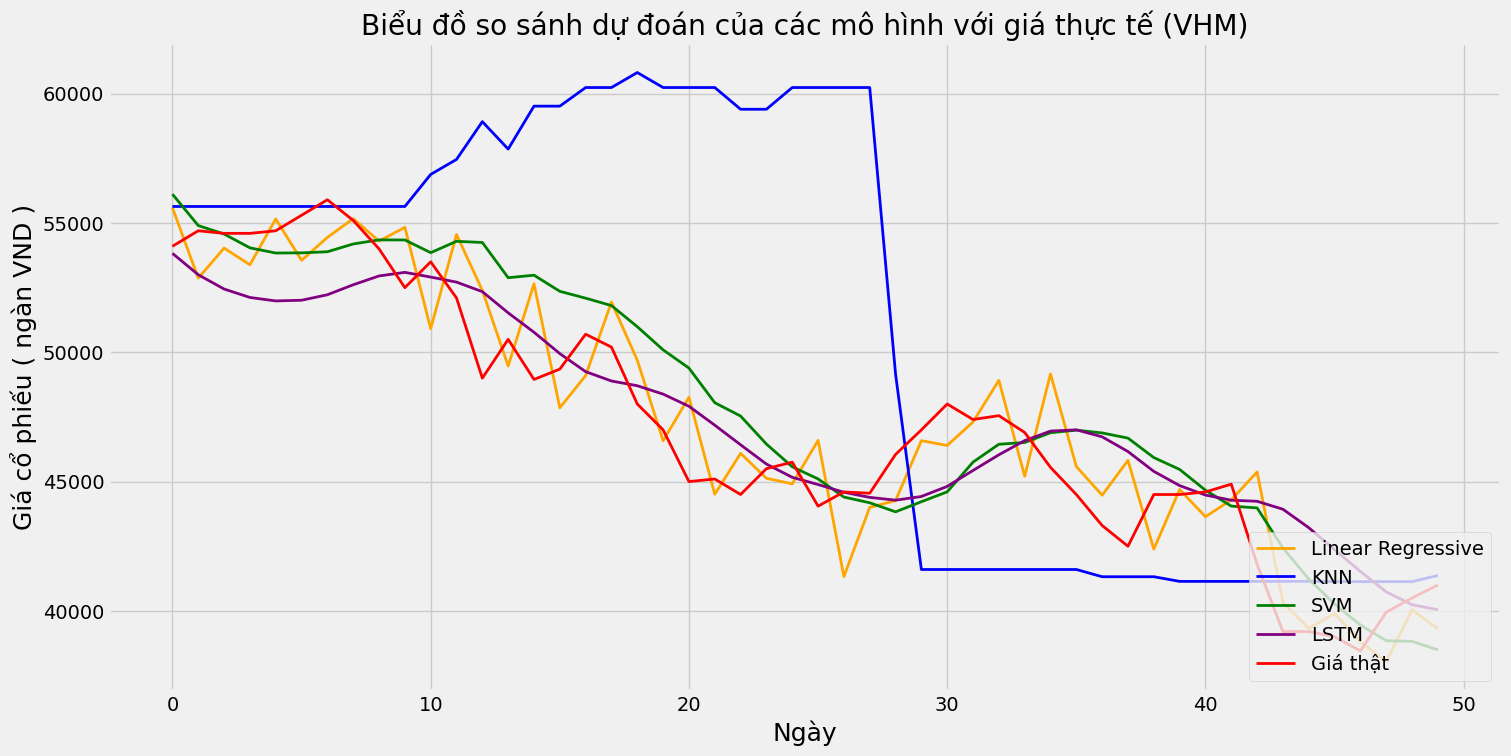

In [19]:
#Biểu đồ so sánh dự đoán của các mô hình với giá thực tế
plt.figure(figsize=(16,8))
plt.title("Biểu đồ so sánh dự đoán của các mô hình với giá thực tế ("+"VHM"+ ")")
plt.plot(predictions1[0],color="Orange",linewidth=2)
plt.plot(predictions2[0],color="Blue",linewidth=2)
plt.plot(predictions3[0],color="green",linewidth=2)
plt.plot(predictions4,color="Purple",linewidth=2)
plt.plot(y_test,color="red",linewidth=2)
plt.xlabel("Ngày",fontsize=18)
plt.ylabel("Giá cổ phiếu ( ngàn VND )",fontsize=18)
plt.legend(["Linear Regressive","KNN","SVM","LSTM","Giá thật"], loc='lower right')
plt.show()

In [20]:
# Vẽ kết hợp trước và lúc dự đoán
data_noi = data_stock[:201]
kq = data_noi.append(kq)

<ipython-input-20-effdc2f72db5>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



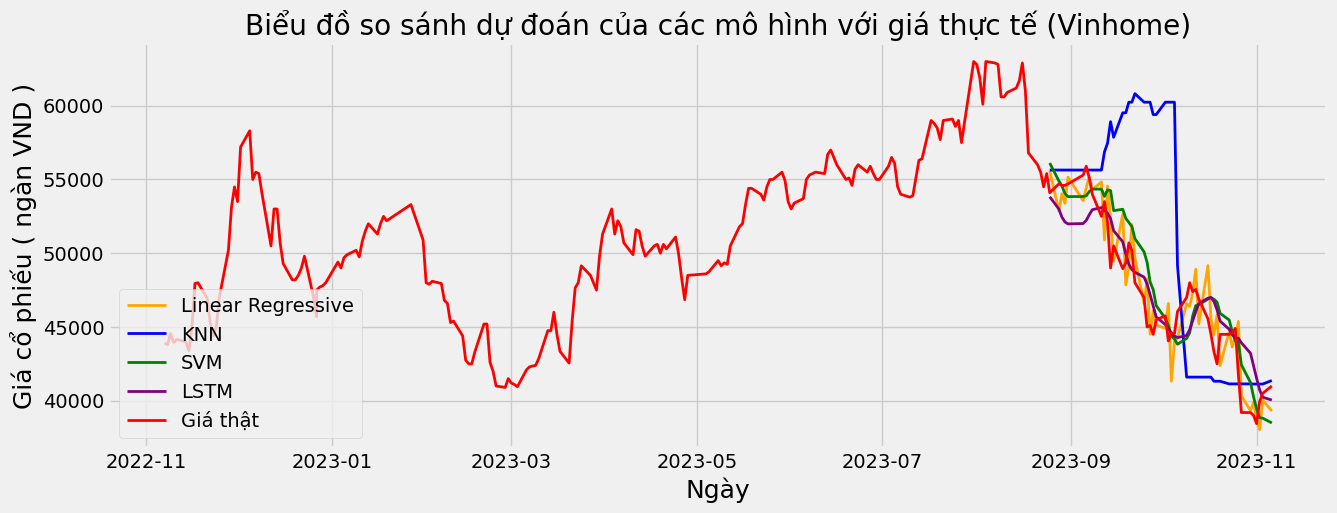

In [21]:
# Biểu đồ so sánh dự đoán của các mô hình với giá thực tế
plt.figure(figsize=(14, 5))
plt.title("Biểu đồ so sánh dự đoán của các mô hình với giá thực tế ("+"Vinhome"+ ")")
plt.plot(kq['Linear Regresstive'],color="Orange",linewidth=2)
plt.plot(kq['KNN'],color="Blue",linewidth=2)
plt.plot(kq['SVM'],color="green",linewidth=2)
plt.plot(kq['Lstm'],color="Purple",linewidth=2)
plt.plot(kq['close'],color="red",linewidth=2)
plt.xlabel("Ngày",fontsize=18)
plt.ylabel("Giá cổ phiếu ( ngàn VND )",fontsize=18)
plt.legend(["Linear Regressive","KNN","SVM","LSTM", "Giá thật"], loc='lower left')
plt
plt.savefig('foo.png')
plt.savefig('foo.pdf')

In [22]:
y_test_2 = []
for i in y_test:
  y_test_2.extend(i)
y_test_2 = np.array(y_test_2)

In [23]:
# Tính độ lệch rmse chuẩn của các mô hình
rmse1 = np.sqrt(np.mean(((predictions1[0]- y_test_2)**2)))
rmse2 = np.sqrt(np.mean(((predictions2[0]- y_test_2)**2)))
rmse3 = np.sqrt(np.mean(((predictions3[0]- y_test_2)**2)))
rmse4 = np.sqrt(np.mean(((predictions4- y_test_2)**2)))

print("Độ lệch chuẩn Linear Regressive",rmse1)
print("Độ lệch chuẩn KNN",rmse2)
print("Độ lệch chuẩn SVM",rmse3)
print("Độ lệch chuẩn LSTM",rmse4)

Độ lệch chuẩn Linear Regressive 1815.545259536153
Độ lệch chuẩn KNN 7840.410065806507
Độ lệch chuẩn SVM 2209.4966019193926
Độ lệch chuẩn LSTM 2103.699015930674


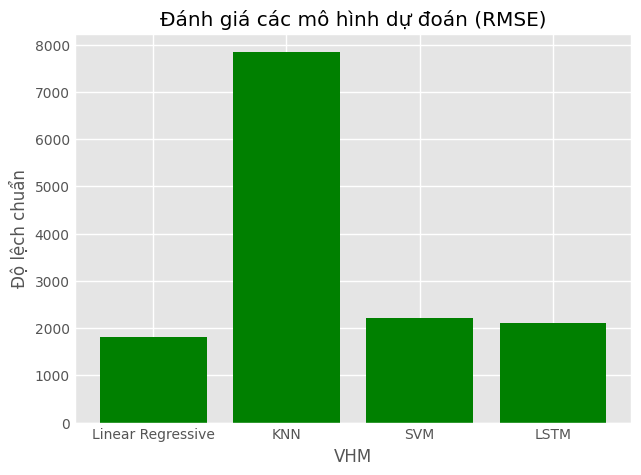

In [24]:
# Biểu đồ so sánh sai số (độ lệch chuẩn) của các mô hình
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = ['Linear Regressive',  'KNN','SVM', 'LSTM']
energy = [rmse1, rmse2, rmse3, rmse4]

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, energy, color='green')
plt.xlabel("VHM")
plt.ylabel("Độ lệch chuẩn")
plt.title("Đánh giá các mô hình dự đoán (RMSE)")

plt.xticks(x_pos, x)

plt.show()

In [25]:
# Chuyển thành bài toán phân loại chỉ xét tính tăng/giảm của giá không xét tới giá trị
from sklearn.metrics import average_precision_score ,f1_score,accuracy_score
def score(predictions,y_test):
  t1 = []
  for i in range(1,len(predictions)):
    if predictions[i-1] < predictions[i]:
      t1.append(0)
    else:
      t1.append(1)
  t2 = []
  for i in range(1,len(y_test)):
    if y_test[i-1] < y_test[i]:
      t2.append(0)
    else:
      t2.append(1)
  print("f1_score",f1_score(t1, t2))
  print("Mean Accuracy",average_precision_score(t1, t2))
  print("Mean Sharp",accuracy_score(t1, t2))
  print("\n")

In [26]:
print("Linear Regressive:")
score(predictions1[0],y_test_2)
print("KNN:")
score(predictions2[0],y_test_2)
print("SVM")
score(predictions3[0],y_test_2)
print("LSTM:")
score(predictions4,y_test_2)

Linear Regressive:
f1_score 0.4230769230769231
Mean Accuracy 0.46497354497354504
Mean Sharp 0.3877551020408163


KNN:
f1_score 0.6764705882352942
Mean Accuracy 0.8452150507899636
Mean Sharp 0.5510204081632653


SVM
f1_score 0.6031746031746033
Mean Accuracy 0.7183379524649366
Mean Sharp 0.4897959183673469


LSTM:
f1_score 0.625
Mean Accuracy 0.7473391759106045
Mean Sharp 0.5102040816326531




In [27]:
# Thay dữ liệu thực tế vào lấy ra kết quả dự đoán
# Chọn ngày muốn test mô hình
# Dữ liệu 60 ngày trước ngày mai sẽ được truyền vào:
data_truyen_truc_tiep = [x_test[-1]]
print("Số ngày đã lấy:",len(data_truyen_truc_tiep[0]))
print(scaler.inverse_transform([x_test[-1]]))

Số ngày đã lấy: 60
[[60600. 60900. 61200. 61700. 62900. 61000. 56800. 56000. 55500. 54500.
  55400. 54100. 54700. 54600. 54600. 54700. 55300. 55900. 55100. 54000.
  52500. 53500. 52100. 49000. 50500. 48950. 49350. 50700. 50200. 48000.
  47000. 45000. 45100. 44500. 45500. 45750. 44050. 44600. 44550. 46050.
  47000. 48000. 47400. 47550. 46900. 45550. 44500. 43300. 42500. 44500.
  44500. 44600. 44900. 41800. 39200. 39200. 39000. 38450. 39950. 40500.]]


In [28]:
print("Mô hình Linear Regressive dự đoán ra giá của ngày mai là:")
print(scaler.inverse_transform([model_linear.predict(data_truyen_truc_tiep)]))
print("Mô hình KNN dự đoán ra giá của ngày mai là:")
print(scaler.inverse_transform([knn_model.predict(data_truyen_truc_tiep)]))
print("Mô hình SVM dự đoán ra giá của ngày mai là:")
print(scaler.inverse_transform([svm_model.predict(data_truyen_truc_tiep)]))
print("Mô hình LSTM dự đoán ra giá của ngày mai là:")
data_truyen_truc_tiep_3D = np.array(data_truyen_truc_tiep)
data_truyen_truc_tiep_3D = np.reshape(data_truyen_truc_tiep_3D, (data_truyen_truc_tiep_3D.shape[0],data_truyen_truc_tiep_3D.shape[1],1))
print(scaler.inverse_transform(model.predict(data_truyen_truc_tiep_3D)))

Mô hình Linear Regressive dự đoán ra giá của ngày mai là:
[[39304.72403411]]
Mô hình KNN dự đoán ra giá của ngày mai là:
[[41370.]]
Mô hình SVM dự đoán ra giá của ngày mai là:
[[38492.3811625]]
Mô hình LSTM dự đoán ra giá của ngày mai là:
1/1 [==============================] - 0s 27ms/step
[[40042.996]]
